In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
import ellipses as el
from matplotlib.patches import Ellipse
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
import seaborn as sb


In [119]:
faces = np.load('../data/jaws.npy')

In [135]:
a = faces[2]
a = a[a[:,0].argsort()]
x = a[:, 0]
y = a[:, 1]

In [131]:
def x2(x, a, b, c):
    return a*x**2 + b*x + c

def x4(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def x6(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

def ex(x, a, b, c, d):
    return a*np.exp(b*x + c) + d

def exn(x, a, b, c, d):
    return a*np.exp(b*x**2 + c) + d

def cs(x, a, b,c, d):
    return a*np.cos(b*x + c) + d

def pw(x, a, b, c):
    return a**(b*x) + c

def ch(x, a, b):
    return a*np.cosh(x/a) + b

sym_functions = [x2, x4, x6, ch]
# sym_functions = [cs]


[0.02899    0.01286212 0.01354979]
[0.06132596 0.0284509  0.0499097  0.01701448 0.00781337]
[0.23660067 0.11389807 0.28460795 0.11203545 0.09270566 0.02529796
 0.00727827]
[0.01113736 0.00718364]


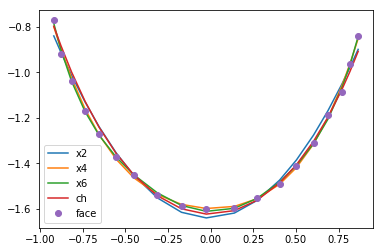

In [158]:
cutoff = 7
for f in sym_functions:
    try:
        popt, pcov = cf(f, x[cutoff:-cutoff], y[cutoff:-cutoff])
    except RuntimeError:
        print(f.__name__ + ' is sad')
        continue
    print(np.sqrt(np.diag(pcov)))
    plt.plot(x[cutoff:-cutoff], f(x[cutoff:-cutoff], *popt),'-', label=f.__name__)
plt.plot(x[cutoff:-cutoff], y[cutoff:-cutoff], 'o', label='face')
plt.legend()
plt.show()

[0.0022840580458264098, -0.17756103845409998] 0.9933295013189609 1.4346247381534476 -0.028408690273572613


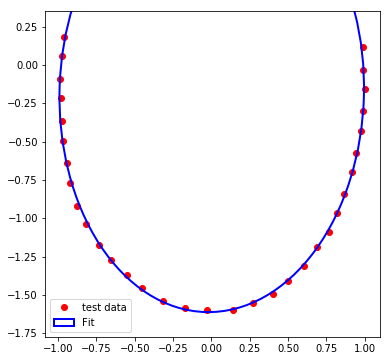

In [157]:
data = [x, y]
lsqe = el.LSqEllipse()
lsqe.fit(data)
center, width, height, phi = lsqe.parameters()

print(center, width, height, phi)

plt.close('all')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(data[0], data[1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
               edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)

plt.legend()
plt.show()

[7.28657076e+00 1.84215845e+01 1.64361938e+01 5.84124885e+00
 5.89907456e-01 1.44686785e-01 1.42474043e-02]


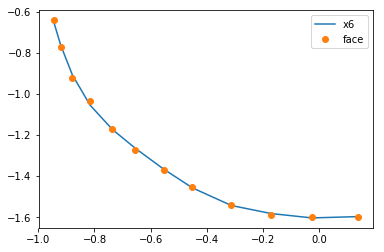

In [156]:
a, b = x[6:18], y[6:18]

functions = [x6]
for f in functions:
    try:
        popt, pcov = cf(f, a, b)
    except RuntimeError:
        print(f.__name__ + ' is sad')
        continue
    print(np.sqrt(np.diag(pcov)))
#     print(popt)
    plt.plot(a, f(a, *popt),'-', label=f.__name__)
plt.plot(a, b, 'o', label='face')

# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.show()

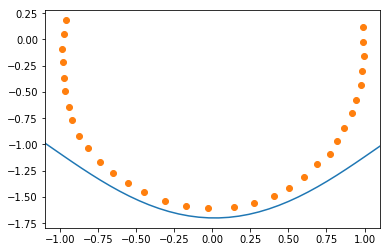

In [246]:
# cycloid
w = 0.1
v = 1
t = np.arange(0, 2*np.pi, 0.1)
r = -0.6
xx = r*(t - w*np.sin(t))+1.9
yy = r*(1 - v*np.cos(t))-0.5
plt.plot(xx, yy)
plt.plot(x, y, 'o')
plt.xlim(-1.1,1.1)
plt.show()

[0.04744979 0.02201334 0.03861668 0.01316463 0.00604544]


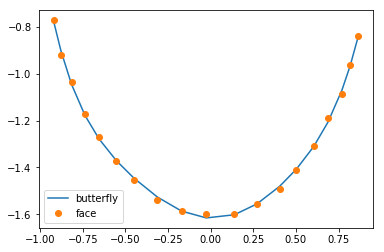

In [252]:
# catastrophe theory
def fold(x, a, z):
    return x**3 + a*x + z

def cusp(x, a, b, z):
    return x**4 + a*x**2 + b*x + z

def swallowtail(x, a, b, c, z):
    return x**5 + a*x**3 + b*x**2 + c*x + z

def butterfly(x, a, b, c, d, z):
    return x**6 + a*x**4 + b*x**3 + c*x**2 + d*x + z

catastrophes = [butterfly]
cutoff = 7
for f in catastrophes:
    try:
        popt, pcov = cf(f, x[cutoff:-cutoff], y[cutoff:-cutoff])
    except RuntimeError:
        print(f.__name__ + ' is sad')
        continue
    print(np.sqrt(np.diag(pcov)))
    plt.plot(x[cutoff:-cutoff], f(x[cutoff:-cutoff], *popt),'-', label=f.__name__)
plt.plot(x[cutoff:-cutoff], y[cutoff:-cutoff], 'o', label='face')
plt.legend()
plt.show()
